In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv('vi_6_14_2023.csv').reset_index()

In [3]:
csv.columns = ['index', 'task_id', 'date', 'name', 'notes', 'artwork', 'acq_no', 'artist', 'level', 'submitter', 'witness', 'location', 'age_group', 'response', 'damage', 'resolution', 'touch_type', 'reaction', 'correction']
csv = csv.drop('index', axis=1)

In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   task_id     7928 non-null   int64  
 1   date        7928 non-null   object 
 2   name        7927 non-null   object 
 3   notes       7925 non-null   object 
 4   artwork     7772 non-null   object 
 5   acq_no      5402 non-null   object 
 6   artist      7712 non-null   object 
 7   level       7923 non-null   object 
 8   submitter   7926 non-null   object 
 9   witness     7925 non-null   object 
 10  location    7916 non-null   object 
 11  age_group   4839 non-null   object 
 12  response    7097 non-null   object 
 13  damage      7112 non-null   object 
 14  resolution  1618 non-null   object 
 15  touch_type  0 non-null      float64
 16  reaction    2486 non-null   object 
 17  correction  3955 non-null   object 
dtypes: float64(1), int64(1), object(16)
memory usage: 1.1+ MB


In [5]:
#counts of interactions per artwork BEFORE cleaning
artwork_count = csv[['artwork', 'location', 'artist', 'task_id']].dropna()
artwork_count = artwork_count.groupby(['artwork', 'artist']).size().reset_index(name='count')
artwork_count = artwork_count.sort_values('count', ascending=False)
artwork_count.head()

,artwork,artist,count
678,Elterwater Stone Ring,Richard Long,101
2280,Tipi,Eero Aarnio,87
1991,Synthesa,Franz West,83
2733,Zombie VIII,Thomas Schutte,70
862,Georgia Gate,Thaddeus Mosley,62


In [6]:
#data cleaning
csv = csv.apply(lambda x: x.str.strip().str.title() if x.dtype == 'object' else x)
csv['location'] = csv['location'].replace('Scaife Gallery One', 'Scaife Gallery 01')
csv['month'] = csv['date'].str[:7].reset_index(drop=True)

In [7]:
#counts of each level
interaction_level = csv[['level', 'task_id']].groupby('level').size().reset_index(name='count')
interaction_level.to_csv('interaction_level.csv', index=False)
interaction_level.head()

,level,count
0,Level 0,356
1,Level 1,1777
2,Level 2,5713
3,Level 3,77


In [8]:
#counts of each reaction
reaction_count = csv[['reaction', 'task_id']].groupby('reaction').size().reset_index(name='count')
reaction_count.to_csv(r'reaction_count.csv', index=False)
reaction_count.head()

,reaction,count
0,Ignored Ga,296
1,Negative Reaction To Ga,86
2,Neutral Reaction To Ga,905
3,Positive Reaction To Ga,1199


In [9]:
#count of incidents in each gallery
#gallery_count = csv.groupby('location')['task_id'].count().reset_index(name='incident_count')
#gallery_count = gallery_count.sort_values(['incident_count', 'location'], ascending=[False, True])
#gallery_count.head()

In [10]:
#counts of incidents for each artwork
#artwork_count = csv[['artwork', 'artist', 'task_id']].dropna()
#artwork_count = artwork_count.groupby(['artwork', 'artist'])['task_id'].size().reset_index(name='incident_count')
#artwork_count = artwork_count.sort_values('incident_count', ascending=False)
#artwork_count.head()

#scaife = csv[['location', 'artwork', 'artist', 'task_id']].dropna()
#scaife = scaife.groupby(['location', 'artwork', 'artist'])['task_id'].size().reset_index(name='incident_count')
#scaife = scaife.sort_values('incident_count', ascending=False)
#scaife.head()

In [11]:
#counts of level 2 interactions per artwork
level_2 = csv.loc[csv['level'] == 'Level 2', ['artist', 'artwork', 'task_id']].dropna()
level_2 = level_2.groupby(['artwork', 'artist'])['task_id'].size().reset_index(name='interaction_count')
level_2 = level_2.sort_values('interaction_count', ascending=False)
level_2.head()

,artwork,artist,interaction_count
750,Pictures Of Women Working,Carmen Winant,129
339,Elterwater Stone Ring,Richard Long,129
988,Synthesa,Franz West,118
1203,Untitled,Donald Judd,113
1296,Utopia,Rachel Harrison,108


In [12]:
#separating df by years and adding a month column
years = ['2020', '2021', '2022', '2023']
dfs = {}

for year in years:
    df_year = csv[csv.date.str.contains(year)].reset_index(drop=True)
    df_year['month'] = df_year.date.str[5:7]
    dfs[f'df_{year}'] = df_year

In [13]:
#creating a dataframe to hold a spot for each month
start_date, end_date = "2021-03-01", "2023-06-14"
month_list = (
    pd.period_range(start=start_date, end=end_date, freq='m')
    .to_frame(name='month')
    .astype({'month': 'str'})
    .assign(month=lambda x: x['month'].str[:7])
    .groupby('month')
    .size()
    .reset_index(name='count')
)

In [14]:
#monthly interactions for all data
month_count = csv[['month', 'task_id']]
month_count = month_count.dropna()
month_count = month_count.groupby('month').task_id.count().reset_index()
month_count = pd.merge(month_list, month_count, on='month', how='outer')
month_count['task_id'] = month_count['task_id'].fillna(0)
#month_count = month_count.drop(columns='index')
month_count.to_csv(r'month_count.csv', index=None, header=True)
month_count.head(30)

,month,count,task_id
0,2021-03,1.0,17
1,2021-04,1.0,11
2,2021-05,1.0,9
3,2021-06,1.0,73
4,2021-07,1.0,669
5,2021-08,1.0,434
6,2021-09,1.0,249
7,2021-10,1.0,272
8,2021-11,1.0,405
9,2021-12,1.0,275


In [15]:
#monthly interactions for Richard Long
long_count = csv.loc[(csv['artist'] == 'Richard Long'), ['month','task_id']].reset_index()
long_count = long_count.dropna()
long_count = long_count.groupby('month').task_id.count()
long_count = pd.merge(month_list, long_count, on='month', how='outer')
long_count['task_id'] = long_count['task_id'].fillna(0)
long_count = long_count.drop(columns='count')
long_count.to_csv(r'long_count.csv', index=None, header=True)
long_count.head()

,month,task_id
0,2021-03,0.0
1,2021-04,0.0
2,2021-05,0.0
3,2021-06,2.0
4,2021-07,16.0


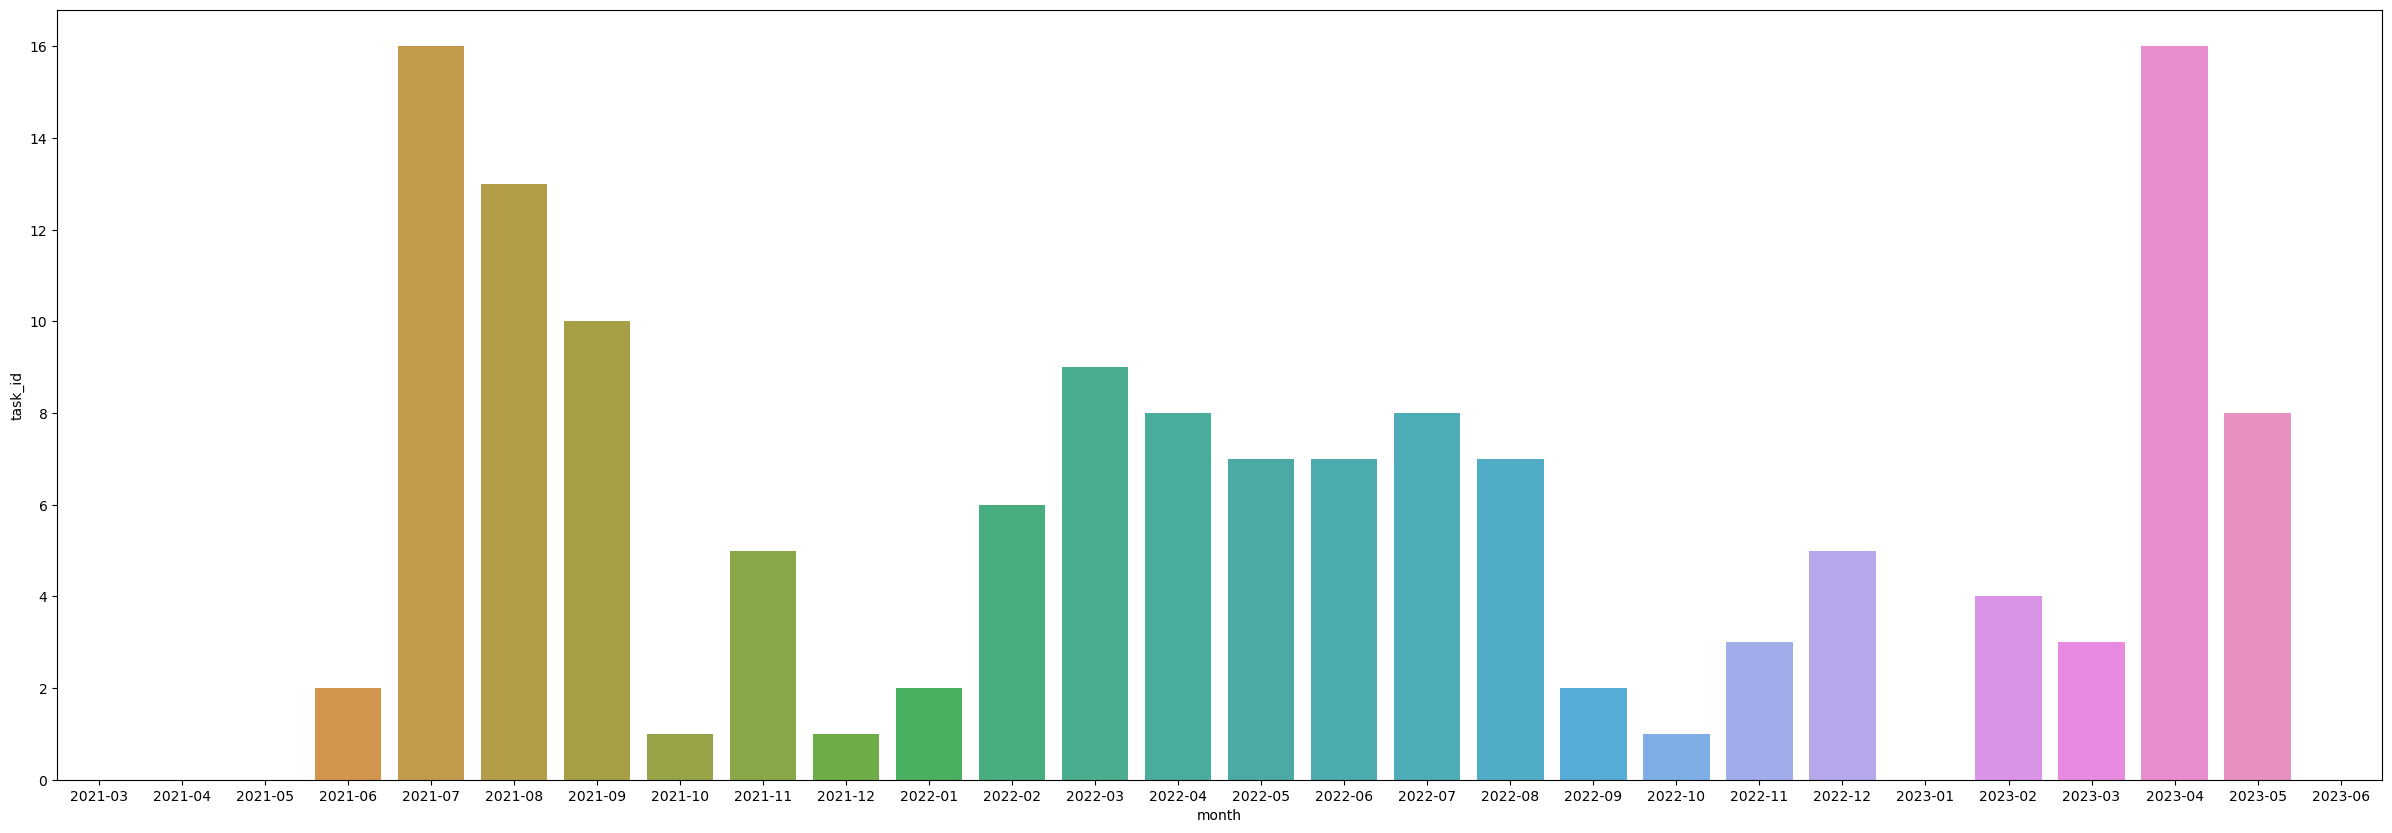

In [16]:
plt.figure(figsize=(30, 10))
ax2 = sns.barplot(data=long_count, x='month', y='task_id')
#ax2.set_title('Evolution of GDP, 2000-2015')
plt.show()

In [17]:
#monthly interactions for gallery
gallery_count = csv.loc[(csv['location'] == 'Scaife Gallery 16'), ['month','task_id']].reset_index()
gallery_count = gallery_count.dropna()
gallery_count = gallery_count.groupby('month').task_id.count()
gallery_count = pd.merge(month_list, gallery_count, on='month', how='outer')
gallery_count['task_id'] = gallery_count['task_id'].fillna(0)
gallery_count = gallery_count.drop(columns='count')
#gallery_count.to_csv(r'gallery_count.csv', index=None, header=True)
gallery_count.head(25)

,month,task_id
0,2021-03,4
1,2021-04,2
2,2021-05,1
3,2021-06,10
4,2021-07,127
5,2021-08,38
6,2021-09,32
7,2021-10,28
8,2021-11,35
9,2021-12,32


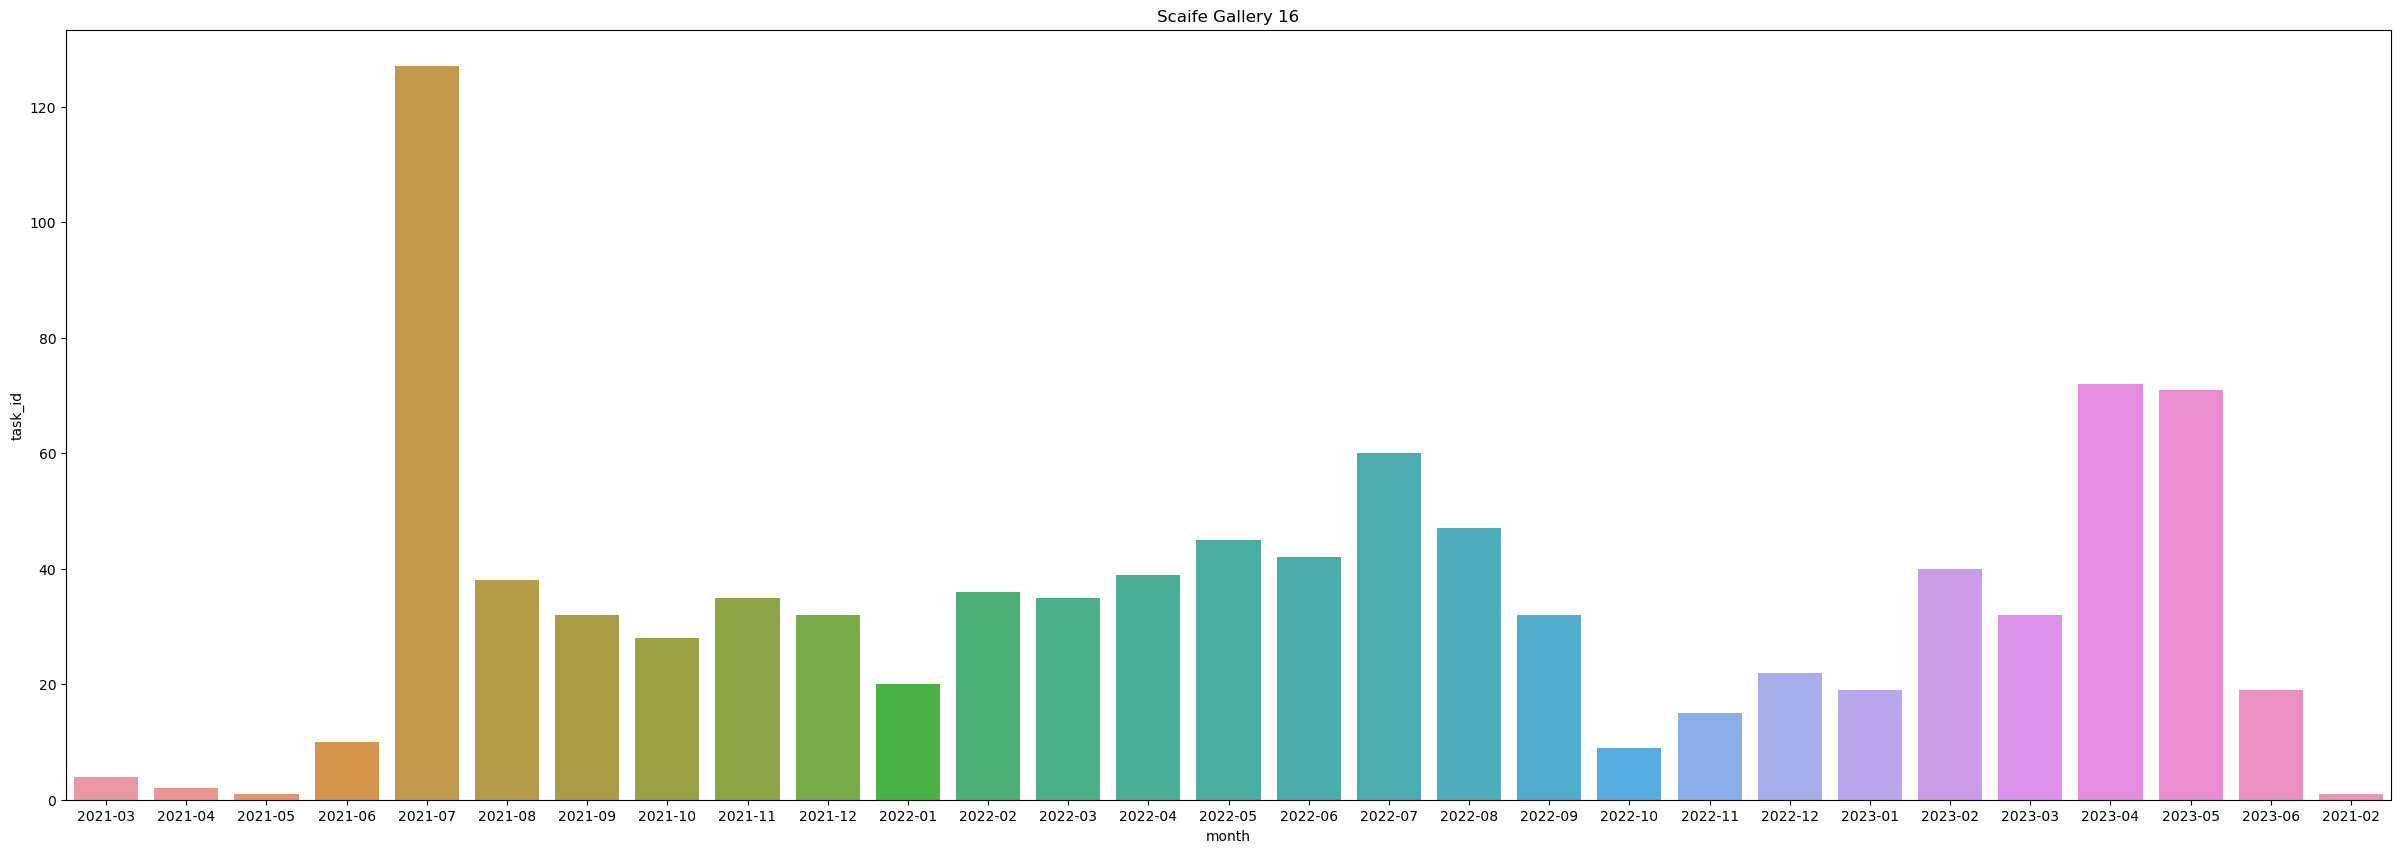

In [18]:
plt.figure(figsize=(30, 10))
ax3 = sns.barplot(data=gallery_count, x='month', y='task_id')
ax3.set_title('Scaife Gallery 16')
plt.show()

In [19]:
scaife = csv[csv.location.str.contains("Scaife", na=False)]
scaife = scaife[['location', 'artwork', 'artist', 'task_id']].dropna()
scaife = scaife.groupby(['location', 'artwork', 'artist'])['task_id'].size().reset_index(name='incident_count')
scaife = scaife.sort_values('incident_count', ascending=False)



scaife.head(25)

,location,artwork,artist,incident_count
697,Scaife Gallery 13,Elterwater Stone Ring,Richard Long,138
405,Scaife Gallery 06,Cabinet With Mirror,Gustave Herter,128
962,Scaife Gallery 16,Synthesa,Franz West,126
752,Scaife Gallery 13,Untitled,Donald Judd,117
1039,Scaife Gallery 17,Georgia Gate,Thaddeus Mosley,110
1025,Scaife Gallery 16,Utopia,Rachel Harrison,110
815,Scaife Gallery 14,Zombie Viii,Thomas Schutte,90
782,Scaife Gallery 14,Cell Ii,Louise Bourgeois,86
1018,Scaife Gallery 16,Untitled: Upturnedhouse,Phyllida Barlow,85
853,Scaife Gallery 15,Untitled,Keith Haring,82
